In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
petrol = pd.read_csv('gdrive/MyDrive/petrol_consumption.csv')

In [ ]:
display(petrol.head())
display(petrol.info())
display(petrol.isna().sum())


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


None

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
X = petrol.iloc[:, 0:4].values
y = petrol.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


In [ ]:
import pandas as pd
df= pd.read_csv('gdrive/MyDrive/Bill_A.csv')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df.head()


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# **Preparing Data For Training**

In [ ]:
#dataset will be scaled before training the algorithm
#The following code divides data into attributes and label
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [ ]:
#The following code divides data into training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## **Feature Scaling**


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#now that we have scaled our dataset, we can train our random forests to solve this classification problem. To do so, execute the following code
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

##**Load the required libraries**: 
The first step is to load the required libraries. We will need the random forest classifier from scikit-learn and NumPy.

In [ ]:
#Load the required libraries: The first step is to load the required libraries. 
#We will need the random forest classifier from scikit-learn and NumPy.
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


## **Import the dataset**: 

Next, we will import the dataset. For this example, we will use the iris dataset that is included in scikit-learn. 
This dataset contains 150 samples of irises, each of which has four features: sepal length, sepal width, petal length, and petal width. 
The goal is to predict the species of iris-based on these four features

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

#**Split the dataset into training and test sets:**
We will split the dataset into training and test sets. 
We will use 70% of the data for training and 30% for testing

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
 

### **Create an instance of Random Forest Classifier**


In [ ]:
# Create an instance of Random Forest Classifier
#n-estimators: This is the number of trees you want to build before taking the maximum voting or averages of predictions. 
#Higher number of trees give you better performance but makes your code slower.
#The random state is simply the lot number of the set generated randomly in any operation. We can specify this lot number whenever we want the same set again
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=10,
                                 random_state=3,
                                 n_jobs=2)

In [ ]:

#Plenty of models have fit methods in scikit-learn. When you call fit method it estimates the best representative function for the the data points (could be a line, polynomial or discrete borders around). 
#With that representation, you can calculate new data points
forest.fit(X_train, y_train)
 

RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=3)

# **Measure model performance**

In [ ]:
# Measure model performance
#Make predictions on the test set: Finally, we will make predictions on the test set and evaluate the accuracy of our model.

y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [ ]:
#Hyperparameter tuning: Once we have a basic model working, we can improve its performance by tuning the hyperparameters. 


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


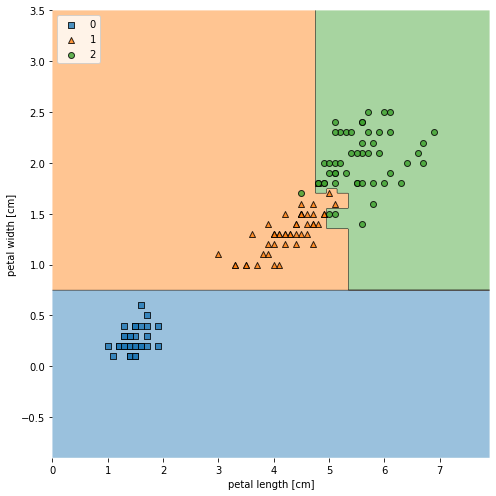

In [ ]:
#The model performance comes out to be 97.8%. 
#Here is what the decision regions will look like after plotting it with plot_decision_regions function mlxtend.plotting class.
from mlxtend.plotting import plot_decision_regions
 
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
 
#
# plot_decision_regions function takes "forest" as classifier
#
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_combined, y_combined, clf=forest)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()